<a href="https://colab.research.google.com/github/Kaushal-Top5699/tensorflow_digit_mnist/blob/main/handwritten_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Apr  1 04:53:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0    48W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Training samples
print(f"Training Sample: \n{train_data[0]}\n")
print(f"Training Label: \n{train_labels[0]}\n")

In [8]:
# Check the shape.
train_data[0].shape, train_labels[0].shape

((28, 28), ())

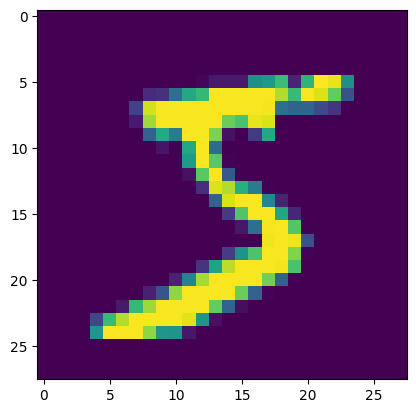

In [13]:
plt.imshow(train_data[0])

In [14]:
train_labels[0]

5

In [17]:
# Creating a small list so we can index onto our training labels so they are human-readable.
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
len(class_names)

10

Text(0.5, 1.0, '8')

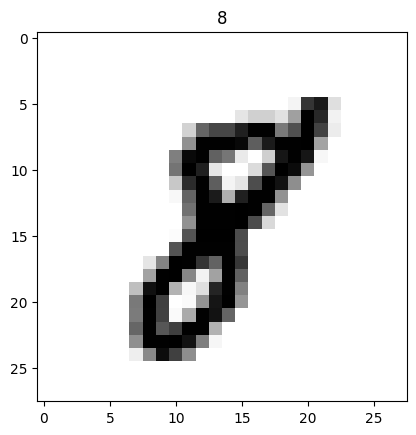

In [19]:
# Plotting an example image.
plt.imshow(train_data[17], cmap = plt.cm.binary)
plt.title(class_names[train_labels[17]])

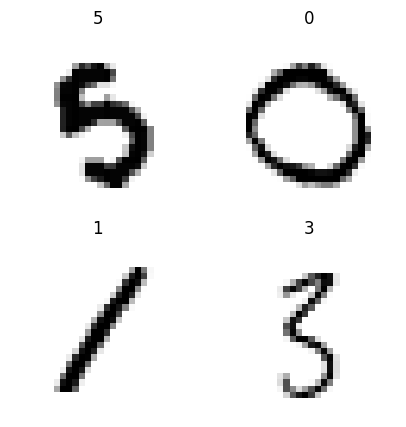

In [29]:
# Plot multiple random images of fashion MNIST.
import random
plt.figure(figsize = (5, 5))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [30]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max(), test_data_norm.min(), test_data_norm.max()

(0.0, 1.0, 0.0, 1.0)

### **Finding ideal learning rate**

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history_1 = model_1.fit(train_data_norm, train_labels, epochs = 40, callbacks = [lr_schedular])
     

<Axes: title={'center': 'Normalized Data'}>

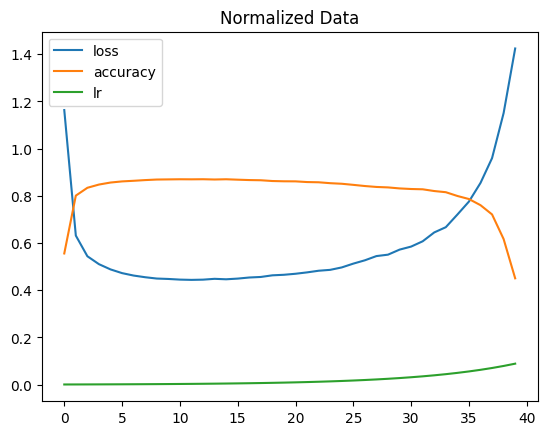

In [34]:
pd.DataFrame(history_1.history).plot(title = "Normalized Data")

Text(0.5, 1.0, 'Finding Ideal Learning Rate')

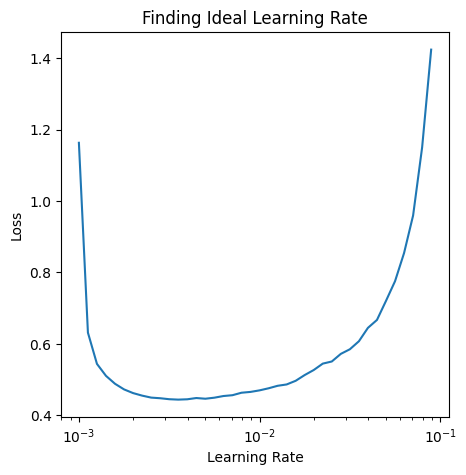

In [36]:
# Plotting learning rate decay curve.
lrs = 1e-3 * 10**(tf.range(40)/20) # these are the learning rate values changing every epoch.
lrs
plt.figure(figsize = (5, 5))
plt.semilogx(lrs, history_1.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding Ideal Learning Rate")

In [37]:
# Looks like this is our ideal learning rate.
10**-3

0.001

In [39]:
# Lets rebuild our model with this ideal learning rate.
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics = ["accuracy"])

In [ ]:
history_2 = model_2.fit(train_data_norm, train_labels, epochs = 20, validation_data = (test_data_norm, test_labels))

<Axes: title={'center': 'Normalized Data'}>

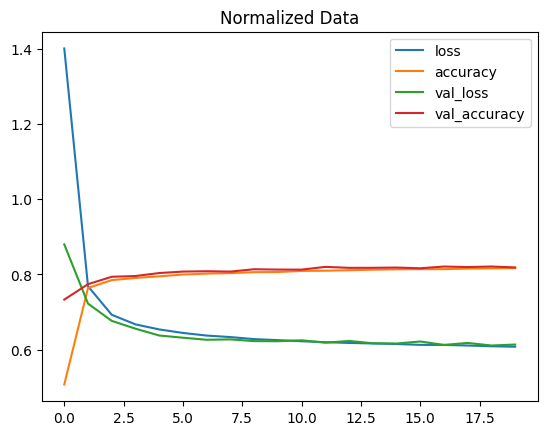

In [41]:
pd.DataFrame(history_2.history).plot(title = "Normalized Data")

In [42]:
y_preds = model_2.predict(test_data_norm)
y_preds

313/313 [==============================] - 0s 1ms/step


array([[2.43895598e-11, 5.53885741e-07, 5.69596731e-11, ...,
        9.92428839e-01, 1.37459065e-04, 4.41429991e-04],
       [8.68059415e-03, 6.13412446e-11, 9.91296411e-01, ...,
        8.78405942e-12, 2.85682995e-06, 2.79574003e-15],
       [6.36420691e-06, 9.44884896e-01, 2.35214643e-02, ...,
        8.68984871e-03, 1.50709553e-02, 4.30235779e-03],
       ...,
       [9.65274194e-06, 1.48767986e-05, 3.44428770e-07, ...,
        1.47300065e-02, 1.66425314e-02, 1.30747914e-01],
       [2.24927198e-02, 7.77183029e-09, 5.89858337e-06, ...,
        3.06967966e-04, 1.08473688e-01, 1.46643631e-03],
       [1.22609651e-02, 1.11028565e-11, 1.52547684e-04, ...,
        6.55165104e-13, 5.08153380e-06, 2.96777991e-10]], dtype=float32)

In [43]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks aa random image and predicts it and also displays its true label.
  """
  # Settingup random integer
  i = random.randint(0, len(images))

  # Create predictions at targets.
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_labels = classes[pred_probs.argmax()]
  true_labels = classes[true_labels[i]]

  #Plot image.
  plt.imshow(target_image, cmap = plt.cm.binary)

  # Change the color of titles depending on the prediction being right or wrong.
  if pred_labels == true_labels:
    color = "green"
  else:
    color = "red"

  # xlabel info. (prediction/true_labels)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_labels, 100*tf.reduce_max(pred_probs), true_labels), color = color)

1/1 [==============================] - 0s 21ms/step


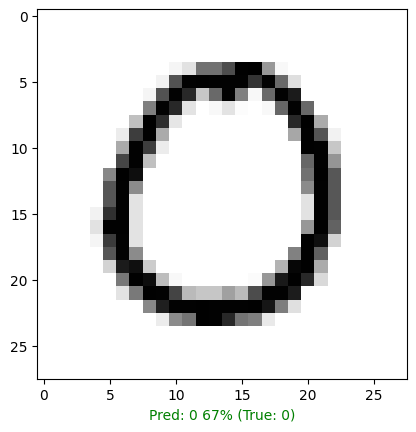

In [49]:
plot_random_image(model_2, test_data_norm, test_labels, class_names)

In [50]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes = None, figsize = (30, 30), text_size = 15):

  # Create a confusion matrix.
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] # Normalize our confusion matrix.
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize = figsize)

  # Create a matrix plot.
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  # Set lables to be classes.
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Create lables.
  ax.set(title = "Confusion Matrix",
        xlabel = "Prediction Label",
        ylabel = "True Lable",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # Set x-axis labels to bottom.
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust the label size.
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors.
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment = "center",
            color = "white" if cm[i, j] > threshold else "black",
            size = text_size)